# **Lab 5: Trapezoidal Rule of Integration**<br>
In calculus, the trapezoidal rule (also known as the trapezoid rule or trapezium rule) is a technique for numerical integration, *i.e.*, approximating the definite integral:
$$\int_{a}^{b}f(x)dx$$

The single-segment trapezoidal rule works by approximating the region under the graph of the function $f(x)$ as a trapezoid and calculating its area. It follows that
$$\int_{a}^{b}f(x)dx \approx \int_{a}^{b}f_1(x)dx = (b-a)\times \left[\frac{f(a)+f(b)}{2}\right]$$

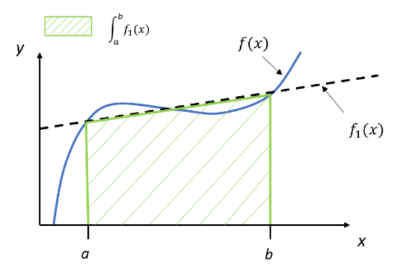

The single-segment trapezoidal rule seldom gives you acceptable results for an integral. Instead for higher accuracy and its control, we can use the composite (also called multiple-segment) trapezoidal rule where the integral is broken into segments, and the single-segment trapezoidal rule is applied over each segment.

The integral $I$ can be broken into $n$ integrals as
\begin{align*}
I &= \int_{a}^{b}f(x)dx\\
&= \int_{a}^{a+h}f(x)dx + \int_{a+h}^{a+2h}f(x)dx + \dots + \int_{a+(n-2)h}^{a+(n-1)h}f(x)dx + \int_{a+(n-1)h}^{a+nh = b}f(x)dx
\end{align*}
where $h=\frac{b-a}{n}$ is the step size.

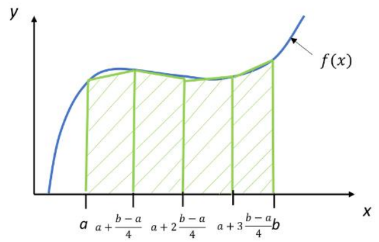

Applying single-segment trapezoidal rule on each segment gives
\begin{align*}
\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left[ f(a) + 2\left\{ \sum_{i=1}^{n-1}f(a+ih) \right\} +f(b) \right]
\end{align*}

In today's lab, we will be implementing the Trapezoidal Rule of Integration in python. To test our implementation, we will be using the same example that is used our class lecture pdf. That way, you can check whether your implementation is working correctly or not by comparing with the results obtained in that example.

The following integral is given:
$$\int_{0.1}^{1.3}5xe^{-2x}dx$$

In [36]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

## Task 1
Use the `scipy.integrate.quad()` function or any other python package's function (*e.g.* `sympy`, `numpy`) to compute the exact value of the aforementioned integral.

Skim thorugh the documentation of `scipy.integrate.quad()` if needed: https://docs.scipy.org/doc/scipy/tutorial/integrate.html#general-integration-quad

In [37]:
def f(x):
    # Write your implementation here.
    func_val = 5*x * (2.718281828459045 ** (-2*x))
    return func_val

In [38]:
def exact_integral(function, lower, upper):
    # Write your implementation here.
    res, error = scipy.integrate.quad(function, lower, upper)
    return res

In [39]:
print(f'True Value: {exact_integral(f,0.1,1.3)}')

True Value: 0.8938650276524703


The true value should be $\approx 0.8938650276524702$.

## Task 2
Use the Single-segment Trapezoidal Rule to approximate the integral. Find the absolute relative true error $|\epsilon_t|$ of the approximation.

In [40]:
def single_segment_trapezoidal(function, lower, upper):
    # Write your implementation here.
    res = (upper - lower) / 2 * (function(lower) + function(upper))
    return res

In [41]:
def absolute_relative_true_error(true, approx):
    # Write your implementation here.
    error = ((true-approx)/true)*100
    return error

In [47]:
print(f'Single-segment Trapezoidal Approximate Value: {single_segment_trapezoidal(f,0.1,1.3)}')
print(f'Absolute Relative True Error: {absolute_relative_true_error(exact_integral(f,0.1,1.3),single_segment_trapezoidal(f,0.1,1.3))}%')

Single-segment Trapezoidal Approximate Value: 0.5352861809592967
Absolute Relative True Error: 40.1155471575947%


The estimated value of the integral should be $\approx 0.5352861809592966$.

The absolute relative true error $|\epsilon_t|$ should be $\approx 40.115547157594705\%$.

## Task 3
Use the Multiple-segment Trapezoidal Rule to approximate the integral. Use $n=3$ segments. Find the absolute relative true error $|\epsilon_t|$ of the approximation.

In [43]:
def multiple_segment_trapezoidal(function, lower, upper, n):
    # Write your implementation here.
    h = (upper - lower) / n
    res = (function(lower) + function(upper)) / 2
    for i in range(1, n):
        res += function(lower + i*h)

    res *= h

    return res

In [48]:
print(f'Multiple-segment Trapezoidal Approximate Value: {multiple_segment_trapezoidal(f,0.1,1.3,3)}')
print(f'Absolute Relative True Error: {absolute_relative_true_error(exact_integral(f,0.1,1.3),multiple_segment_trapezoidal(f,0.1,1.3,3))}%')

Multiple-segment Trapezoidal Approximate Value: 0.8438461669567304
Absolute Relative True Error: 5.595795690441417%


The estimated value of the integral should be $\approx 0.8438461669567302$.

The absolute relative true error $|\epsilon_t|$ should be $\approx 5.595795690441429\%$.

## Task 4
Plot a graph with Number of Segments $(n)$ along the $X$-axis and Absolute Relative True Error $(|\epsilon_t|\%)$ along the $Y$-axis.

Take the value of $n$ as $n=1, 2, 3, \dots, 10$.

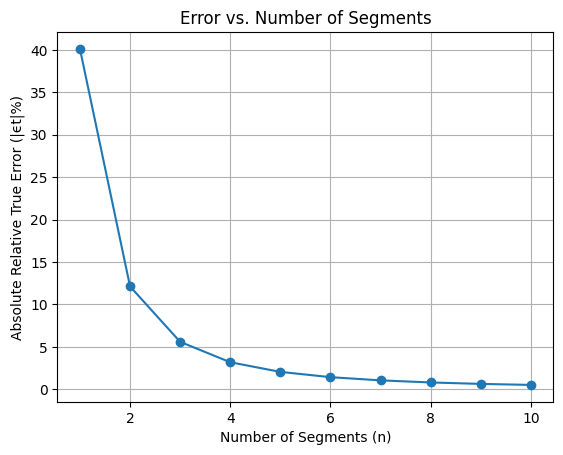

In [52]:
# Write your code here.
errors = []
n_values = np.arange(1,11)
for i in n_values:
    error = absolute_relative_true_error(exact_integral(f,0.1,1.3),multiple_segment_trapezoidal(f,0.1,1.3,i))
    errors.append(error)

plt.plot(n_values, errors, marker='o')
plt.xlabel('Number of Segments (n)')
plt.ylabel('Absolute Relative True Error (|ϵt|%)')
plt.title('Error vs. Number of Segments')
plt.grid(True)
plt.show()

Your plot should look something like,<br>
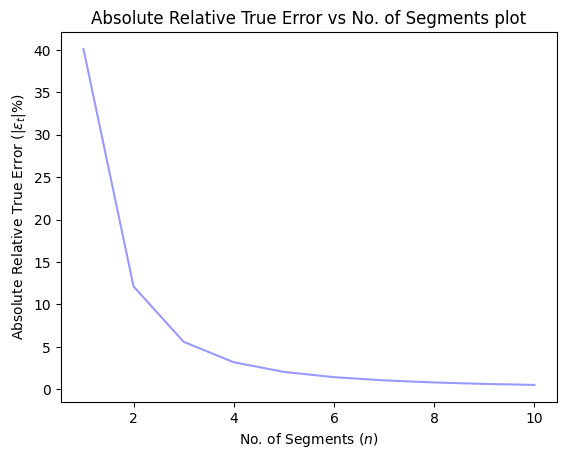